# DSC 680 - Project 2 - Fraud Detection

## Ashley Deibler

#### Variable Definitions: 

- step: unit of time (1 step = 1 hour of time)
    *over course of 30 day simulation*
- type: type of transaction (CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER)
- amount: total amount of transaction ($)
- nameOrg: account that starts the transaction
- oldbalanceOrg: balance of sender's account before transaction
- newbalanceOrg: balance of sender's account after transaction
- nameDest: account recieving the transaction
- oldbalanceDest: balance of reciever's account before transaction
- newbalanceDest: balance of reciever's account after transaction
- isFraud: predicted value (0 = not fraud, 1 = fraud)
- isFlaggedFraud: a flagged illegal attempt to transfer large amounts (in this case, over 200.00)

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Dataset

In [2]:
df = pd.read_csv('C:/Users/diggy/DSC680-Deibler/fraud_data.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


#### Exploratory Data Analysis

C:\Users\diggy\AppData\Local\Temp\ipykernel_7520\757345542.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


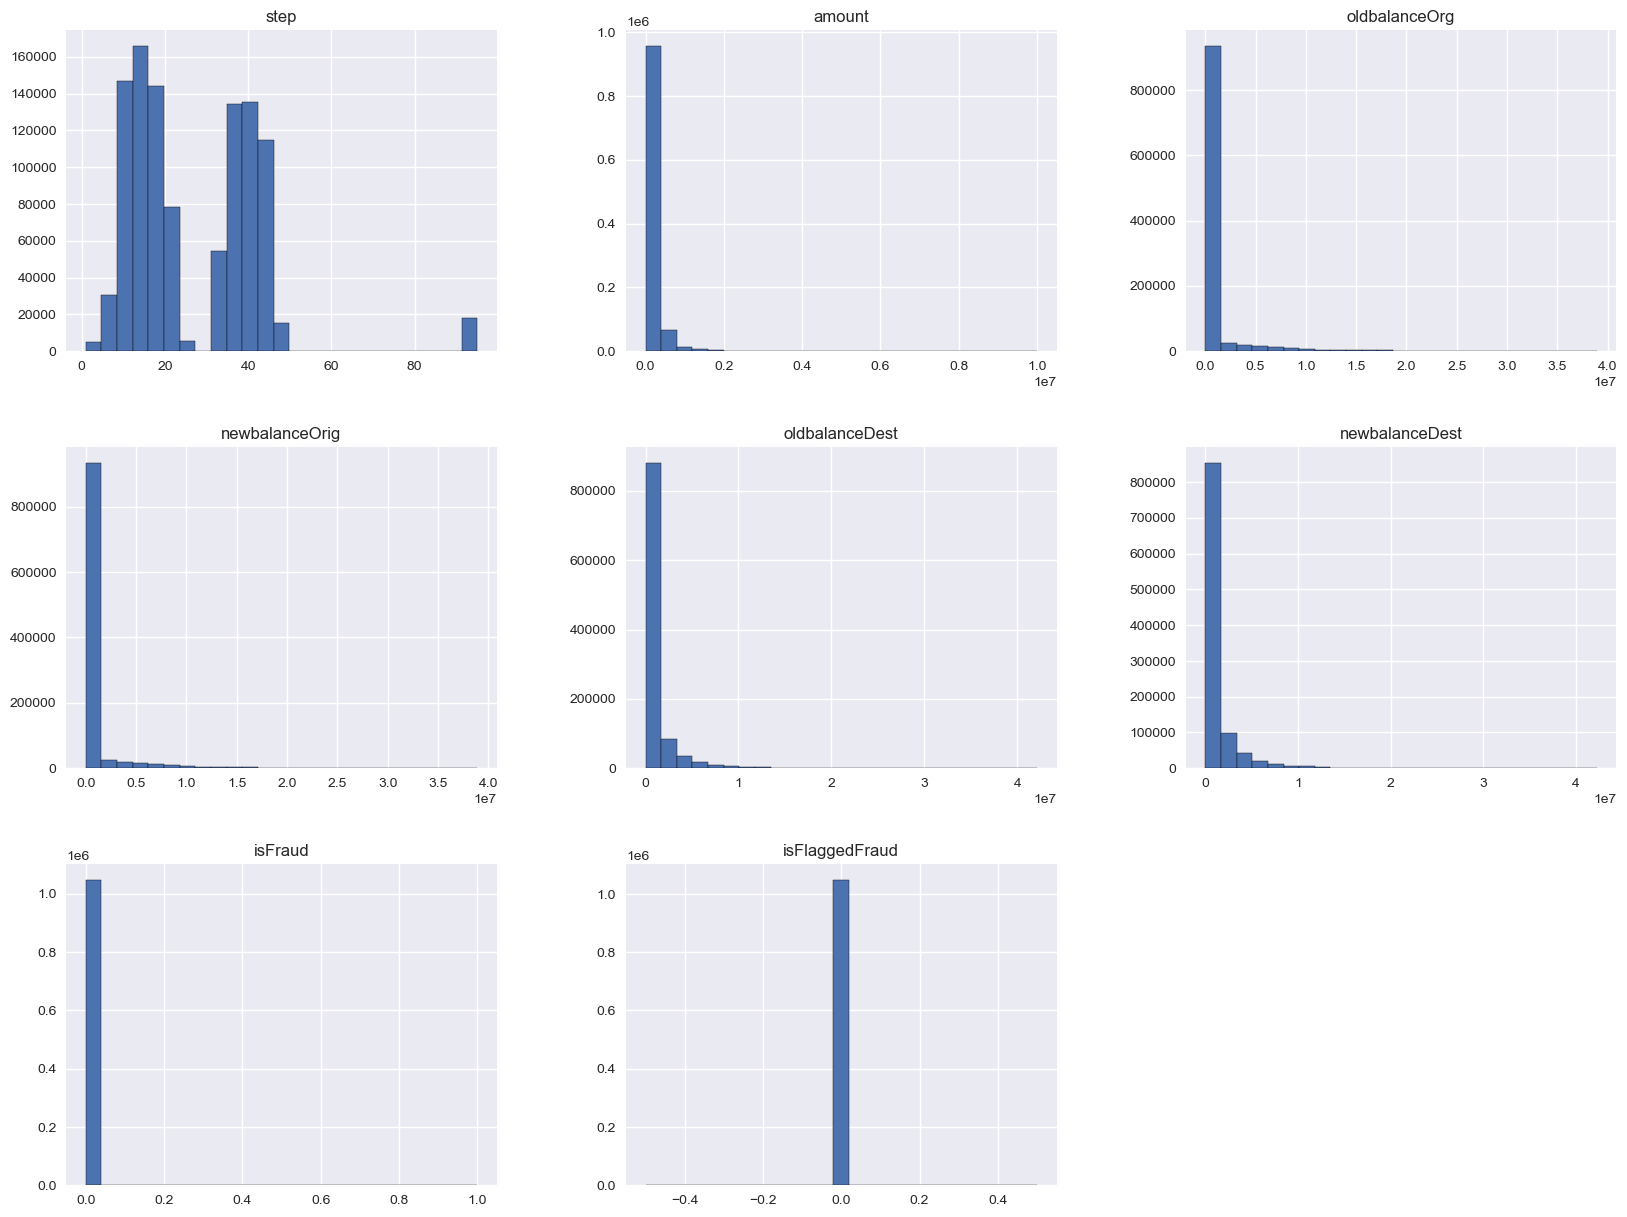

In [5]:
## Visualization of Distribution
plt.style.use('seaborn')
df.hist(bins=25, figsize=(20,15), ec='black')
plt.show()

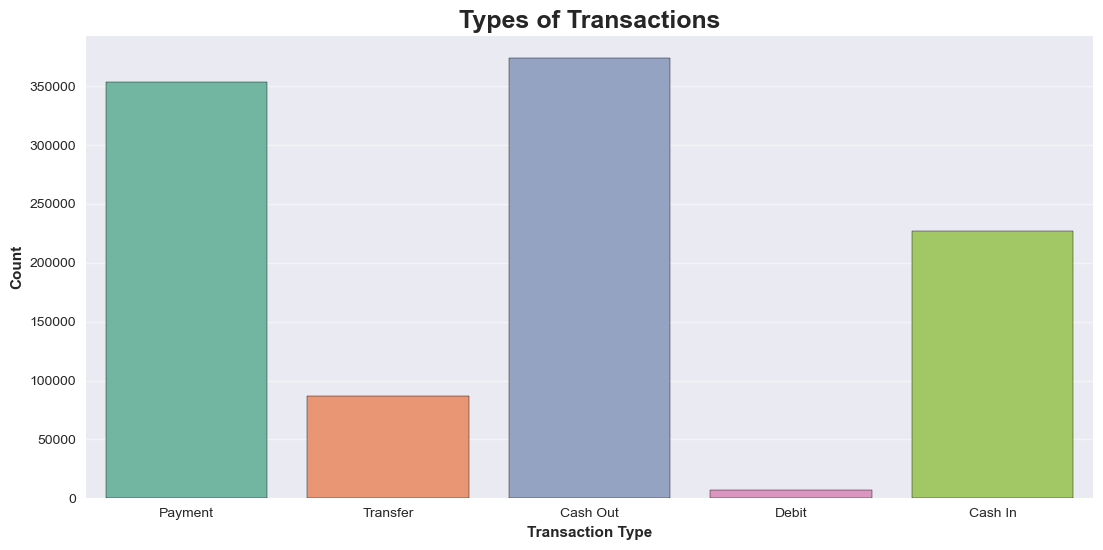

In [6]:
## Transaction Type Analysis

plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='type', data=df, ec='black', palette='Set2')
plt.title('Types of Transactions', fontsize=18, weight='bold')
plt.ylabel('Count', weight='bold')
plt.xlabel('Transaction Type', weight='bold')
plt.xticks(np.arange(5), ['Payment', 'Transfer', 'Cash Out', 'Debit', 'Cash In'])
plt.grid(alpha=0.5, axis='y')
plt.show()

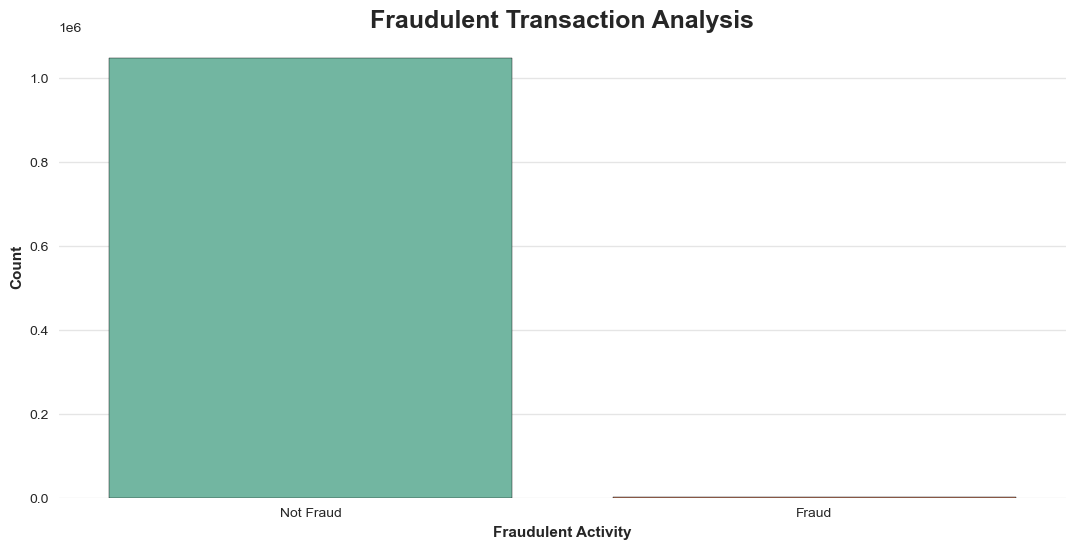

In [7]:
# Fraud Occurrance Analysis
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='isFraud', data=df, ec='black', palette='Set2')
plt.title('Fraudulent Transaction Analysis', fontsize=18, weight='bold')
plt.ylabel('Count', weight='bold')
plt.xlabel('Fraudulent Activity', weight='bold')
plt.xticks(np.arange(2), ['Not Fraud', 'Fraud'])
plt.grid(alpha=0.5, axis='y')
plt.show()

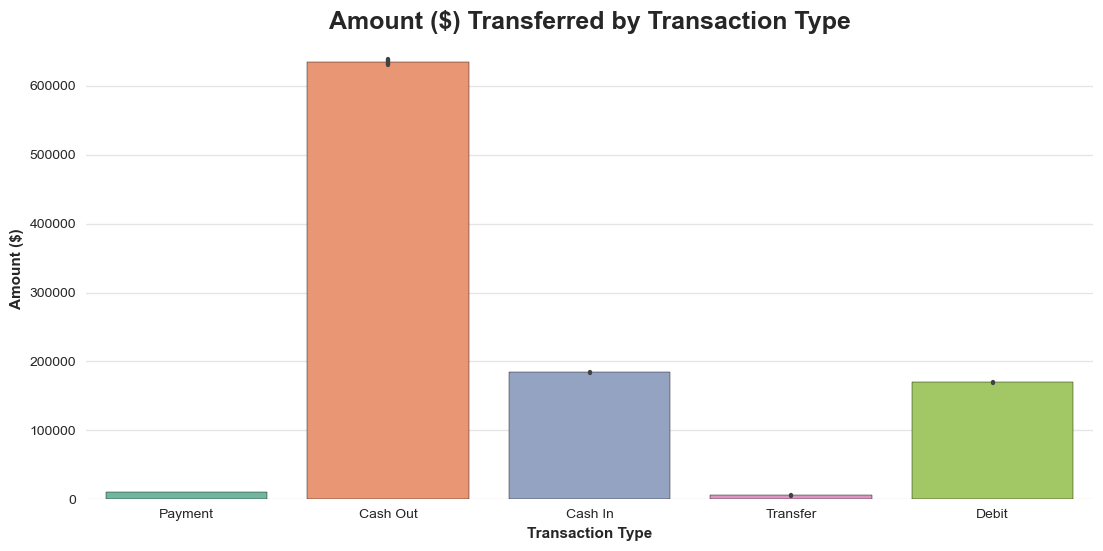

In [8]:
# Transaction Type and Amount Analysis

plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.barplot(x='type', y='amount', data=df, ec='black', palette='Set2')
plt.title('Amount ($) Transferred by Transaction Type', fontsize=18, weight='bold')
plt.ylabel('Amount ($)', weight='bold')
plt.xlabel('Transaction Type', weight='bold')
plt.xticks(np.arange(5), ['Payment', 'Cash Out', 'Cash In', 'Transfer', 'Debit'])
plt.grid(alpha=0.5, axis='y')
plt.show()

## Data Preprocessing

In [9]:
## Encode 'type' column

newType = pd.get_dummies(df['type'], drop_first = True)
newDf = pd.concat([df, newType], axis = 1)
newDf.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [10]:
## drop irrelevent columns

x = newDf.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = newDf['isFraud']

In [11]:
## Check shape of data

x.shape, y.shape

((1048575, 11), (1048575,))

In [12]:
## Split data into training & testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Model Training

I will be using LogisticRegression, XGBClassifier, and RandomForestClassifier. 

In [13]:
# import models

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Logistic Regression

logres = LogisticRegression()
logres.fit(X_train, y_train)
logres_pred = logres.predict(X_test)
logres_trainpred = logres.predict_proba(X_train)[:, 1]
y_pred_logres = logres.predict_proba(X_test)[:, 1]

print('Logistic Regression: ')
print('Training Accuracy : ', ras(y_train, logres_trainpred))
print('Validation Accuracy :', ras(y_test, y_pred_logres))


C:\Users\diggy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 
Training Accuracy :  0.8720961764621917
Validation Accuracy : 0.8679537518250263


In [15]:
# Gradient Boosted Decision Tree Classifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_trainpred = xgb.predict_proba(X_train)[:, 1]
y_pred_xgb = xgb.predict_proba(X_test)[:, 1]

print('XG Boost Classifier: ')
print('Training Accuracy : ', ras(y_train, xgb_trainpred))
print('Validation Accuracy :', ras(y_test, y_pred_xgb))

XG Boost Classifier: 
Training Accuracy :  0.9999973092422925
Validation Accuracy : 0.9945838283597735


In [16]:
# Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=7, criterion = 'entropy', random_state=7)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_trainpred = rfc.predict_proba(X_train)[:, 1]
y_pred_rfc = rfc.predict_proba(X_test)[:, 1]

print('Random Forest Classifier :')
print('Training Accuracy : ', ras(y_train, rfc_trainpred))
print('Validation Accuracy : ', ras(y_test, y_pred_rfc))

Random Forest Classifier :
Training Accuracy :  0.9993687683644535
Validation Accuracy :  0.9454586427567742


The XGBoost Model performed the best with a training accuracy value of 0.99999, and a validation accuracy of 0.9946

This is the model we will move forward with in evaluation and deployment. 

In [32]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

cr = classification_report(y_test, xgb_pred)
score = accuracy_score(y_test, xgb_pred)

print('XGBoost Classifier: ')
print('Accuracy Score: {:.4f}'.format(score))
print('Evaluations: ')
print(cr)

XGBoost Classifier: 
Accuracy Score: 0.9998
Evaluations: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.97      0.86      0.91       349

    accuracy                           1.00    314573
   macro avg       0.98      0.93      0.95    314573
weighted avg       1.00      1.00      1.00    314573



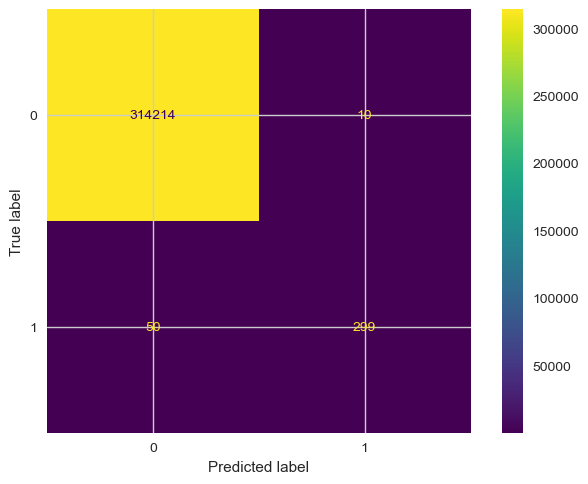

In [24]:
xgb_cm = ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)